![uc3m logo](https://assets.onthehub.com/attachments/15/401d138e-5b75-de11-b7f9-0030487d8896/3d13020c-f96c-4a26-8c47-b617961e9c81.jpg)

#AA2024 - GRUPO 15 - PRÁTICA 1

**Github:** https://github.com/rosareyes/AA2024-G15-P1

---

**Integrantes:**

Rosa Reyes - 100434072

Sebastian Stoean - 100429139



## 1) EDA: Análisis Exploratorio de Datos

En el Análisis Exploratorio de Datos, procederemos a analizar muy brevemente el conjunto de datos proporcionado. Antes de empezar, hacemos todas las importaciones necesarias.

In [ ]:
# Importaciones básicas
import time
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
from IPython.display import display
from google.colab import drive


# test
# Importaciones generales de Scikitlearn
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, PredefinedSplit, GridSearchCV, RandomizedSearchCV, TimeSeriesSplit, cross_val_score

# Importaciones para KNN
from sklearn.neighbors import KNeighborsRegressor

# Importaciones para Árboles de Regresión
from sklearn import tree

# Importaciones para regressión lineal
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# Importaciones para el Análisis Principal de Componentes
from sklearn.decomposition import PCA

# Importaciones para SVM y Random Forests
from sklearn.svm import SVR
from scipy.stats import loguniform
from sklearn.ensemble import RandomForestRegressor

# Carga del modelo final
from joblib import dump

Luego, procedemos a cargar los datos y mostrarlos, en este caso, debemos usar google drive para cargar el contenido.


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
wind_ava = pd.read_csv("/content/drive/MyDrive/AA-2024/P1/wind_ava.csv.gz", compression="gzip")

Mounted at /content/drive


In [ ]:
# Opciones de display para que nos muestre la tabla entera

pd.options.display.max_columns = 1000
pd.options.display.max_rows = 5000

# Mostramos las primeras 100 filas del dataset para ver como luce
wind_ava.head(100)

,datetime,energy,p54.162.1,p54.162.2,p54.162.3,p54.162.4,p54.162.5,p54.162.6,p54.162.7,p54.162.8,p54.162.9,p54.162.10,p54.162.11,p54.162.12,p54.162.13,p54.162.14,p54.162.15,p54.162.16,p54.162.17,p54.162.18,p54.162.19,p54.162.20,p54.162.21,p54.162.22,p54.162.23,p54.162.24,p54.162.25,p55.162.1,p55.162.2,p55.162.3,p55.162.4,p55.162.5,p55.162.6,p55.162.7,p55.162.8,p55.162.9,p55.162.10,p55.162.11,p55.162.12,p55.162.13,p55.162.14,p55.162.15,p55.162.16,p55.162.17,p55.162.18,p55.162.19,p55.162.20,p55.162.21,p55.162.22,p55.162.23,p55.162.24,p55.162.25,cape.1,cape.2,cape.3,cape.4,cape.5,cape.6,cape.7,cape.8,cape.9,cape.10,cape.11,cape.12,cape.13,cape.14,cape.15,cape.16,cape.17,cape.18,cape.19,cape.20,cape.21,cape.22,cape.23,cape.24,cape.25,p59.162.1,p59.162.2,p59.162.3,p59.162.4,p59.162.5,p59.162.6,p59.162.7,p59.162.8,p59.162.9,p59.162.10,p59.162.11,p59.162.12,p59.162.13,p59.162.14,p59.162.15,p59.162.16,p59.162.17,p59.162.18,p59.162.19,p59.162.20,p59.162.21,p59.162.22,p59.162.23,p59.162.24,p59.162.25,lai_lv.1,lai_lv.2,lai_lv.3,lai_lv.4,lai_lv.5,lai_lv.6,lai_lv.7,lai_lv.8,lai_lv.9,lai_lv.10,lai_lv.11,lai_lv.12,lai_lv.13,lai_lv.14,lai_lv.15,lai_lv.16,lai_lv.17,lai_lv.18,lai_lv.19,lai_lv.20,lai_lv.21,lai_lv.22,lai_lv.23,lai_lv.24,lai_lv.25,lai_hv.1,lai_hv.2,lai_hv.3,lai_hv.4,lai_hv.5,lai_hv.6,lai_hv.7,lai_hv.8,lai_hv.9,lai_hv.10,lai_hv.11,lai_hv.12,lai_hv.13,lai_hv.14,lai_hv.15,lai_hv.16,lai_hv.17,lai_hv.18,lai_hv.19,lai_hv.20,lai_hv.21,lai_hv.22,lai_hv.23,lai_hv.24,lai_hv.25,u10n.1,u10n.2,u10n.3,u10n.4,u10n.5,u10n.6,u10n.7,u10n.8,u10n.9,u10n.10,u10n.11,u10n.12,u10n.13,u10n.14,u10n.15,u10n.16,u10n.17,u10n.18,u10n.19,u10n.20,u10n.21,u10n.22,u10n.23,u10n.24,u10n.25,v10n.1,v10n.2,v10n.3,v10n.4,v10n.5,v10n.6,v10n.7,v10n.8,v10n.9,v10n.10,v10n.11,v10n.12,v10n.13,v10n.14,v10n.15,v10n.16,v10n.17,v10n.18,v10n.19,v10n.20,v10n.21,v10n.22,v10n.23,v10n.24,v10n.25,sp.1,sp.2,sp.3,sp.4,sp.5,sp.6,sp.7,sp.8,sp.9,sp.10,sp.11,sp.12,sp.13,sp.14,sp.15,sp.16,sp.17,sp.18,sp.19,sp.20,sp.21,sp.22,sp.23,sp.24,sp.25,stl1.1,stl1.2,stl1.3,stl1.4,stl1.5,stl1.6,stl1.7,stl1.8,stl1.9,stl1.10,stl1.11,stl1.12,stl1.13,stl1.14,stl1.15,stl1.16,stl1.17,stl1.18,stl1.19,stl1.20,stl1.21,stl1.22,stl1.23,stl1.24,stl1.25,u10.1,u10.2,u10.3,u10.4,u10.5,u10.6,u10.7,u10.8,u10.9,u10.10,u10.11,u10.12,u10.13,u10.14,u10.15,u10.16,u10.17,u10.18,u10.19,u10.20,u10.21,u10.22,u10.23,u10.24,u10.25,v10.1,v10.2,v10.3,v10.4,v10.5,v10.6,v10.7,v10.8,v10.9,v10.10,v10.11,v10.12,v10.13,v10.14,v10.15,v10.16,v10.17,v10.18,v10.19,v10.20,v10.21,v10.22,v10.23,v10.24,v10.25,t2m.1,t2m.2,t2m.3,t2m.4,t2m.5,t2m.6,t2m.7,t2m.8,t2m.9,t2m.10,t2m.11,t2m.12,t2m.13,t2m.14,t2m.15,t2m.16,t2m.17,t2m.18,t2m.19,t2m.20,t2m.21,t2m.22,t2m.23,t2m.24,t2m.25,stl2.1,stl2.2,stl2.3,stl2.4,stl2.5,stl2.6,stl2.7,stl2.8,stl2.9,stl2.10,stl2.11,stl2.12,stl2.13,stl2.14,stl2.15,stl2.16,stl2.17,stl2.18,stl2.19,stl2.20,stl2.21,stl2.22,stl2.23,stl2.24,stl2.25,stl3.1,stl3.2,stl3.3,stl3.4,stl3.5,stl3.6,stl3.7,stl3.8,stl3.9,stl3.10,stl3.11,stl3.12,stl3.13,stl3.14,stl3.15,stl3.16,stl3.17,stl3.18,stl3.19,stl3.20,stl3.21,stl3.22,stl3.23,stl3.24,stl3.25,iews.1,iews.2,iews.3,iews.4,iews.5,iews.6,iews.7,iews.8,iews.9,iews.10,iews.11,iews.12,iews.13,iews.14,iews.15,iews.16,iews.17,iews.18,iews.19,iews.20,iews.21,iews.22,iews.23,iews.24,iews.25,inss.1,inss.2,inss.3,inss.4,inss.5,inss.6,inss.7,inss.8,inss.9,inss.10,inss.11,inss.12,inss.13,inss.14,inss.15,inss.16,inss.17,inss.18,inss.19,inss.20,inss.21,inss.22,inss.23,inss.24,inss.25,stl4.1,stl4.2,stl4.3,stl4.4,stl4.5,stl4.6,stl4.7,stl4.8,stl4.9,stl4.10,stl4.11,stl4.12,stl4.13,stl4.14,stl4.15,stl4.16,stl4.17,stl4.18,stl4.19,stl4.20,stl4.21,stl4.22,stl4.23,stl4.24,stl4.25,fsr.1,fsr.2,fsr.3,fsr.4,fsr.5,fsr.6,fsr.7,fsr.8,fsr.9,fsr.10,fsr.11,fsr.12,fsr.13,fsr.14,fsr.15,fsr.16,fsr.17,fsr.18,fsr.19,fsr.20,fsr.21,fsr.22,fsr.23,fsr.24,fsr.25,flsr.1,flsr.2,flsr.3,flsr.4,flsr.5,flsr.6,flsr.7,flsr.8,flsr.9,flsr.10,flsr.11,flsr.12,flsr.13,flsr.14,flsr.15,flsr.16,flsr.17,flsr.18,flsr.19,flsr.20,flsr.21,flsr.22,flsr.23,flsr

Ahora:

- comprobamos que no existen missing values en el conjunto de datos
-  **Importante**: de los datos originales, hay que
quitar todas las variables meteorológicas que no correspondan a la localización de Sotavento (la
localización 13).


Por lo tanto, filtramos solo las columnas necesitamos, es decir, las que empiezan por '.13' y la de energy y datetime.

In [ ]:
cols_13 = ['energy', 'datetime'] + [col for col in wind_ava.columns if col.endswith('.13')]
wind_ava_13 = wind_ava[cols_13]
print(wind_ava_13.head())


    energy             datetime    p54.162.13  p55.162.13    cape.13  \
0   402.71  2005-01-02 18:00:00  2.510824e+06    9.186295  13.527577   
1   696.80  2005-01-03 00:00:00  2.513173e+06    8.849569   6.896412   
2  1591.15  2005-01-03 06:00:00  2.509627e+06    7.924080   4.774439   
3  1338.62  2005-01-03 12:00:00  2.510571e+06    6.922709   0.000000   
4   562.50  2005-01-03 18:00:00  2.505664e+06    6.646282   0.000000   

     p59.162.13  lai_lv.13  lai_hv.13   u10n.13   v10n.13         sp.13  \
0  1.386937e+06   2.344111   2.432983 -0.757587 -1.922799  99846.319914   
1  1.153526e+06   2.343719   2.432838 -1.412620 -1.403011  99917.733093   
2  1.098754e+06   2.343300   2.432704 -2.290185 -0.754580  99764.378681   
3  1.076021e+06   2.342830   2.432514 -3.497855  1.271028  99672.670459   
4  1.070830e+06   2.342437   2.432369 -0.971249  0.553060  99372.811211   

      stl1.13    u10.13    v10.13      t2m.13     stl2.13     stl3.13  \
0  280.960661 -0.906454 -2.709511  280.4730

In [ ]:
# Columnas
print(wind_ava_13.columns)

Index(['energy', 'datetime', 'p54.162.13', 'p55.162.13', 'cape.13',
       'p59.162.13', 'lai_lv.13', 'lai_hv.13', 'u10n.13', 'v10n.13', 'sp.13',
       'stl1.13', 'u10.13', 'v10.13', 't2m.13', 'stl2.13', 'stl3.13',
       'iews.13', 'inss.13', 'stl4.13', 'fsr.13', 'flsr.13', 'u100.13',
       'v100.13'],
      dtype='object')


In [ ]:
wind_ava_13.describe()


,energy,p54.162.13,p55.162.13,cape.13,p59.162.13,lai_lv.13,lai_hv.13,u10n.13,v10n.13,sp.13,stl1.13,u10.13,v10.13,t2m.13,stl2.13,stl3.13,iews.13,inss.13,stl4.13,fsr.13,flsr.13,u100.13,v100.13
count,4748.000000,4.748000e+03,4748.000000,4748.000000,4.748000e+03,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000
mean,693.126247,2.489477e+06,16.008810,31.166541,1.706692e+06,2.815222,2.576284,0.386215,0.120528,97820.301287,286.666391,0.303070,0.167105,285.689253,286.663838,286.665988,0.074229,0.049971,286.668152,0.413677,-5.908467,0.447175,0.328204
std,665.531609,4.482599e+04,6.552216,121.758977,1.466953e+06,0.397377,0.116434,3.100583,3.016766,713.689654,6.414325,3.158104,3.058615,6.163483,5.547947,4.582827,0.367013,0.379014,3.552873,0.007602,0.094359,4.841730,4.667552
min,0.010000,2.358748e+06,1.650268,0.000000,5.610341e+04,2.323973,2.425866,-8.619823,-8.867441,93770.364813,273.498473,-8.483701,-8.845246,268.970603,275.461648,278.389271,-1.714897,-1.438829,280.875389,0.364805,-6.130465,-11.879053,-13.043453
25%,144.170000,2.458543e+06,11.203264,0.000000,6.563209e+05,2.425944,2.461630,-1.950008,-2.050920,97459.369264,281.809651,-2.300545,-2.116098,281.458939,282.287394,282.689506,-0.126880,-0.148495,283.405549,0.410027,-5.977599,-3.836853,-3.256194
50%,465.305000,2.490478e+06,15.543441,1.004148,1.239176e+06,2.758857,2.560520,0.048820,-0.191853,97861.147677,286.063980,0.027782,-0.236536,285.395453,286.191880,286.204914,0.010551,-0.003569,286.591659,0.410917,-5.947220,0.282399,-0.389416
75%,1089.375000,2.525134e+06,20.214077,14.143328,2.296548e+06,3.205385,2.688526,2.641779,2.016289,98251.478418,291.173637,2.632151,2.239831,289.740438,291.345311,290.989045,0.232378,0.172325,290.024705,0.417070,-5.858848,4.187953,3.614395
max,2792.550000,2.580387e+06,39.230807,2311.662152,1.110694e+07,3.450745,2.762992,12.974802,11.699814,99917.733093,305.043177,12.941947,11.698349,305.000640,299.556292,295.639998,2.842552,2.366522,292.808658,0.428914,-5.618172,18.964137,16.913033


Ahora, procedemos a:

- Comprobar si hay null values.
- Vemos si hay columnas constantes
- Comprobar si son variables categóricas o numéricas
- Comprobar si es un problema de regresión o clasificación


Procedemos a ver si hay null values, utilizando la función isnull().values.sum(). Y como podemos ver a continuación, no los hay.

In [ ]:
print('Suma de valores nulos: ',wind_ava_13.isnull().values.sum())

Suma de valores nulos:  0


Ahora identificamos las **Columnas Constantes**, que son aquellas que tienen un único valor.

In [ ]:
cols_constantes = [col for col in wind_ava_13.columns if wind_ava_13[col].nunique() == 1]
print(cols_constantes)

wind_ava_13_sin_constantes = wind_ava_13.drop(columns=cols_constantes)

print("Antes de eliminar columnas constantes:", wind_ava_13.shape)
print("Después de eliminar columnas constantes:", wind_ava_13_sin_constantes.shape)


[]
Antes de eliminar columnas constantes: (4748, 24)
Después de eliminar columnas constantes: (4748, 24)


En nuestro caso, no hay columnas constantes.

**Ahora, comprobamos las variables categoricas y numericas:** en nuestro caso claramente son todas numericas debido a la naturaleza de los datos, que son datos meteorologicos, como por ejemplo, la temperatura. Y además, una variable de tipo fecha, que es datetime.




In [ ]:
wind_ava_13.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4748 entries, 0 to 4747
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   energy      4748 non-null   float64
 1   datetime    4748 non-null   object 
 2   p54.162.13  4748 non-null   float64
 3   p55.162.13  4748 non-null   float64
 4   cape.13     4748 non-null   float64
 5   p59.162.13  4748 non-null   float64
 6   lai_lv.13   4748 non-null   float64
 7   lai_hv.13   4748 non-null   float64
 8   u10n.13     4748 non-null   float64
 9   v10n.13     4748 non-null   float64
 10  sp.13       4748 non-null   float64
 11  stl1.13     4748 non-null   float64
 12  u10.13      4748 non-null   float64
 13  v10.13      4748 non-null   float64
 14  t2m.13      4748 non-null   float64
 15  stl2.13     4748 non-null   float64
 16  stl3.13     4748 non-null   float64
 17  iews.13     4748 non-null   float64
 18  inss.13     4748 non-null   float64
 19  stl4.13     4748 non-null  

Finalmente, podemos confirmar que se trata de un tipo de **problema de regresión**, dado que la variable de respuesta es "energía" y el tipo de datos que tenemos.

### Análisis adicional

Dado que todas las variables son numéricas, podemos proceder con un análisis de correlación para entender cómo se relacionan estas variables entre sí. Podemos usar el coeficiente de correlación de Pearson, que mide la correlación lineal entre pares de variables. Los valores de correlación pueden variar entre -1 y 1, donde:

    1 indica una correlación positiva perfecta.
    -1 indica una correlación negativa perfecta.
    0 indica que no hay correlación lineal.

### Análisis de Correlación

Primero, calculamos la matriz de correlación y luego visualizamos esta matriz usando un mapa de calor para hacerla más interpretable.

In [ ]:
# solo cogemos los datos numéricos para la matriz de correlación y la gráfica

wind_ava_13_numeric = wind_ava_13.select_dtypes(include=[np.number])
# Calcular la matriz de correlación
correlation_matrix = wind_ava_13_numeric.corr()

# Mostrar la matriz de correlación
print(correlation_matrix)

              energy  p54.162.13  p55.162.13   cape.13  p59.162.13  lai_lv.13  \
energy      1.000000   -0.239832    0.000785 -0.047995    0.446710  -0.211480   
p54.162.13 -0.239832    1.000000    0.358850  0.076709   -0.402154   0.639292   
p55.162.13  0.000785    0.358850    1.000000  0.275533    0.066936   0.421470   
cape.13    -0.047995    0.076709    0.275533  1.000000    0.003355   0.123329   
p59.162.13  0.446710   -0.402154    0.066936  0.003355    1.000000  -0.272114   
lai_lv.13  -0.211480    0.639292    0.421470  0.123329   -0.272114   1.000000   
lai_hv.13  -0.213400    0.654980    0.435308  0.128238   -0.274646   0.998615   
u10n.13     0.241616   -0.291222    0.287126  0.030579    0.549388  -0.089417   
v10n.13     0.310246   -0.268769    0.239527  0.004093    0.349320  -0.237667   
sp.13      -0.191786    0.495013   -0.265860 -0.146495   -0.305721  -0.061967   
stl1.13    -0.197850    0.723378    0.564382  0.233210   -0.246174   0.773762   
u10.13      0.244619   -0.28

Hemos utilizado ChatGPT para que nos ayudase a interpretar la matriz.

Una vez analizada la matriz de correlación, con la ayuda de ChatGPT, podemos sacar los siguientes insights:

- **Alta correlación entre variables similares:** Hay una correlación significativa entre variables que representan aspectos similares del clima, pero a diferentes alturas o medidas. Por ejemplo, u10n.13 y u100.13 tienen una correlación muy alta (0.978), lo que indica que los componentes del viento U a diferentes alturas tienen comportamientos similares. Lo mismo ocurre entre v10n.13 y v100.13, mostrando una correlación significativa.

- **Correlaciones positivas entre las variables de vegetación lai_lv.13 y lai_hv.13 con otras variables meteorológicas como t2m.13 (temperatura a 2 metros) y stl1.13 (temperatura del suelo nivel 1):** Esto podría sugerir que las condiciones de la vegetación tienen una relación con las temperaturas locales, posiblemente debido a la influencia de la vegetación en la microclima local.

- **Variables relacionadas con la presión y el viento (sp.13, u10n.13, u100.13, etc.) muestran correlaciones significativas entre sí:** Esto es esperado, ya que la dinámica del viento está fuertemente influenciada por las diferencias de presión.


<Axes: >

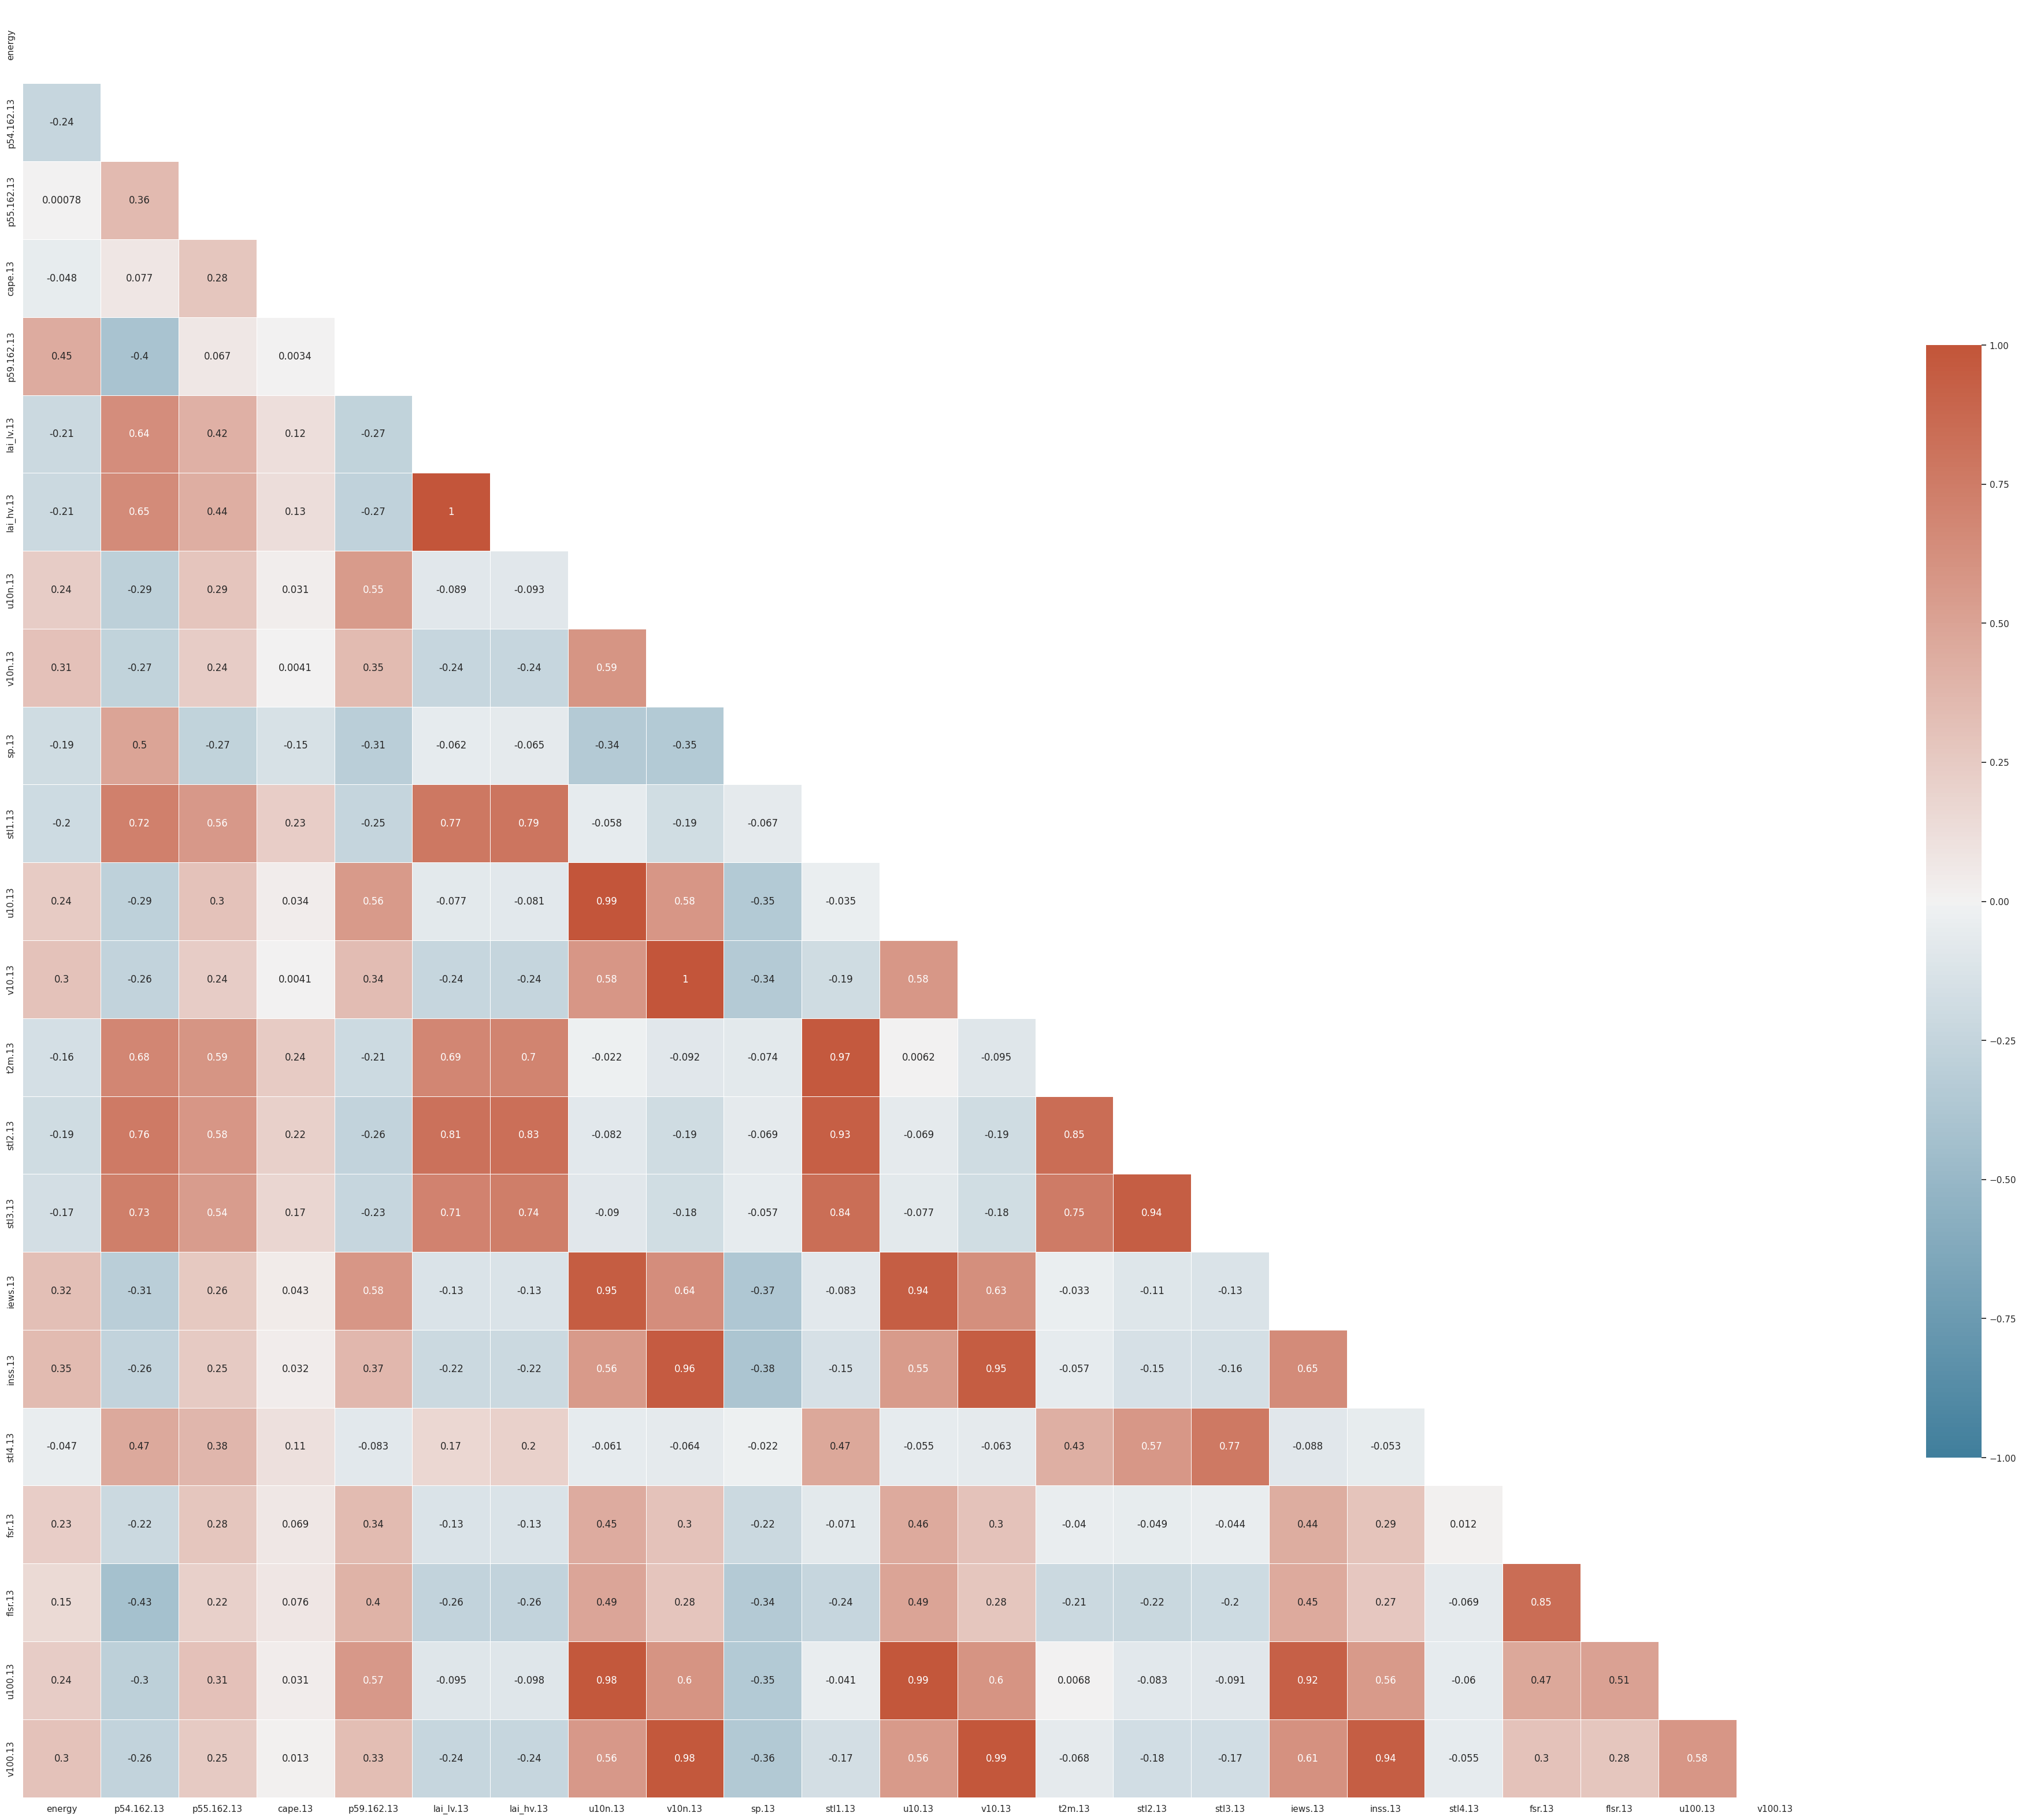

In [ ]:
sns.set_theme(style="white")

median = np.median(wind_ava_13_numeric)

# Generamos una máscara para el triángulo superior
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Creamos la figura del martplotlib
f, ax = plt.subplots(figsize=(50, 50))

# Generamos el colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Dibujamos el heatmap
sns.heatmap(correlation_matrix, annot = True, mask=mask, cmap=cmap, vmin = -1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Podemos ver que hay varias celdas rojo oscuro, que indican una correlación positiva fuerte. Con esto, podemos deducir que muchas de ellas podrán agruparse en forma de combinación lineal de unas con otras, sustituyendo/eliminando muchas variables.

****************************

## 2) Evaluación Inner y Outer. Métricas a usar.

Decidir cómo se va a llevar a cabo la evaluación outer (estimación de rendimiento futuro / evaluación de modelo) y la evaluación inner (para comparar diferentes alternativas y ajustar hiper-parámetros). Decidir qué métrica(s) se van a usar. Justificar las decisiones.

**- Evaluación Inner (Interna):** Implica comparar diferentes modelos y configuraciones de hiperparámetros para obtener la mejor combinación. Esta evaluación utiliza técnicas de validación cruzada y de test split. La validación cruzada es útil para maximizar el uso de los datos y proporcionar una estimación robusta del rendimiento del modelo. El test split, por otro lado, es útil para evaluar el rendimiento del modelo en un conjunto de datos no visto.

**- Evaluación Outer (Externa):** Una vez elegido el mejor modelo y sus hiperparámetros, la evaluación externa mide el rendimiento de este modelo final utilizando un conjunto de datos que no se ha utilizado previamente, es decir, desconocido para el modelo. Esto proporciona una estimación del rendimiento futuro del modelo para datos no vistos con anterioridad.

### Métricas a Usar

  Las métricas más comunes para realizar una evaluación de un modelo de problema de regresión, son:

  - **MSE (Error Cuadrático Medio):** Evalúa la calidad de un modelo de regresión calculando el promedio de los cuadrados de las diferencias entre los valores predichos y los valores reales.

- **MAE (Error Absoluto Medio):** Mide la precisión de los resultados como un cálculo medio de los errores de las predicciones. Sin embargo, a diferencia del RMSE, no es tan sensible a los outliers, ya que no eleva los errores al cuadrado.

-  **R^2 (Coeficiente de Determinación):** Mide cómo se ajustan los valores observados a las predicciones del modelo. Esta métrica utiliza la varianza de tanto los valores observados como de los predichos para calcular el rendimiento del modelo.

 En nuestro caso, **escogemos el MSE**.



  


Para dividir los datos, nos fijamos en la columna de datetime, que es la fecha en la que los datos fueron capturados. Podríamos dividirlo por años o meses. Por simplicidad, lo haremos por años. Procedemos a ver el número de filas por año

In [ ]:
# quitamos los warnings innecesarios
warnings.filterwarnings("ignore")

# convertimos la columna en formato de fecha
wind_ava_13['datetime'] = pd.to_datetime(wind_ava_13['datetime'])
# Contar filas por año
filas_por_año = wind_ava_13['datetime'].dt.year.value_counts().sort_index()
print("Número de filas por año:")
print(filas_por_año)


Número de filas por año:
datetime
2005    1256
2006    1272
2007    1121
2008     178
2009     921
Name: count, dtype: int64


Ahora podemos analizar la cantidad de datos disponibles por año y tomar una decisión.

En este caso, dividimos los datos en train y test. Viendo la cantidad de datos que tenemos, haremos las divisiones de la siguiente manera:

- **Entrenamiento (2005-2008):** cogemos los primeros años para que el modelo aprenda sobre los patrones generales y tenga mucha cantidad de datos.

- **Prueba (2009):** utilizamos el año más reciente para evaluar la capacidad del modelo para futuros comportamientos.


In [ ]:
# cogemos las columnas numericas y quitamos energy
cols_numericas = wind_ava_13.select_dtypes(include=[np.number]).columns.tolist()
cols_numericas.remove('energy')

# Preparar las características (X) y el objetivo (y)
X = wind_ava_13[cols_numericas]
y = wind_ava_13['energy']

test_size = 921 # 921 filas en el año 2009

# Dividir los datos en conjuntos de entrenamiento y prueba
# Aquí ajustamos el tamaño de la prueba según tu especificación y aseguramos que el orden no se mezcle
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=100434072, shuffle=False)

# Imprimir el tamaño de los conjuntos para verificar
print("Tamaño de X_train:", X_train.shape)
print("Tamaño de X_test:", X_test.shape)
print("Muestra de y_test:\n", y_test.head())  # Mostrando las primeras filas de y_test para verificación



Tamaño de X_train: (3827, 22)
Tamaño de X_test: (921, 22)
Muestra de y_test:
 3827     977.91
3828    1191.99
3829     795.88
3830     141.05
3831    1124.20
Name: energy, dtype: float64


Hacemos la cross validation ahora con KNN:

In [ ]:
knn_model = KNeighborsRegressor()

# Definir los hiperparámetros a ajustar
param_grids = {'n_neighbors': [3, 5, 7, 10]}  # Ajustando más valores para ver cuál es óptimo

# Configurar la validación cruzada para series temporales
tss = TimeSeriesSplit(n_splits=3)

# Medir tiempos
start_time = time.time()
knn_model_gs = GridSearchCV(knn_model, param_grids, cv=tss, scoring='neg_mean_squared_error')
knn_model_gs.fit(X_train, y_train)
end_time = time.time()

# Imprimir resultados del ajuste
print("\nEvaluación de KNN\n")
print("Mejores hiperparámetros:", knn_model_gs.best_params_)

# Realizar predicciones con el conjunto de prueba
y_test_predict = knn_model_gs.predict(X_test)

# Calcular RMSE y MAE
rmse = np.sqrt(mean_squared_error(y_test, y_test_predict))
mae = mean_absolute_error(y_test, y_test_predict)

print("RMSE de KNN:", rmse)
print("MAE de KNN:", mae)
print("Tiempo de ejecución de KNN:", end_time - start_time, "segundos")


Evaluación de KNN

Mejores hiperparámetros: {'n_neighbors': 10}
RMSE de KNN: 628.6930597115152
MAE de KNN: 491.48820629750276
Tiempo de ejecución de KNN: 0.8818826675415039 segundos


## 3) Elección del Método de Escalado

A continuación, se decidirá el método de escalado más apropiado para los datos usando KNN. Para ello, se compararán los resultados obtenidos con los siguientes métodos de escalado:
a) Min-Max Scaling
b) Standard Scaling
c) Robust Scaling

In [ ]:
# Definimos los métodos de escalado
scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler()
}

scores = {}


for title, scaler in scalers.items():
    X_scaled = scaler.fit_transform(X)

    # Calcular el rendimiento promedio utilizando la validación cruzada
    score_promedio = np.mean(cross_val_score(knn_model, X_scaled, y, cv=3))

    # Guardar los resultados
    scores[title] = score_promedio

# Imprimir los resultados
for scaler, rend in scores.items():
    print(f"Rendimiento promedio con {scaler}: {rend}")

# Diccionario para guardar los resultados de los scores
inner_scores = {}

# Configuración de TimeSeriesSplit
tss = TimeSeriesSplit(n_splits=5)

# Bucle para aplicar cada escalador en el modelo KNN y evaluar usando validación cruzada
for name, scaler in scalers.items():
    pipeline = Pipeline([
        ('scaler', scaler),
        ('KNN', KNeighborsRegressor())
    ])
    # Usamos 'neg_mean_squared_error' para la métrica de evaluación
    scores = cross_val_score(pipeline, X_train, y_train, cv=tss, scoring='neg_mean_squared_error')
    inner_scores[f'KNN con {name}'] = -np.mean(scores)

print('\nResultados con KNN para cada escalador: \n')
# Mostrar los resultados de manera formatada
for model, score in inner_scores.items():
    print(f"{model}: {score:.4f} MSE")


Rendimiento promedio con StandardScaler: 0.5602410505216214
Rendimiento promedio con MinMaxScaler: 0.4782494405493396
Rendimiento promedio con RobustScaler: 0.571292801530941

Resultados con KNN para cada escalador: 

KNN con StandardScaler: 196649.8905 MSE
KNN con MinMaxScaler: 229384.5735 MSE
KNN con RobustScaler: 203595.6924 MSE


Una vez obtenido los resultados, tomamos en cuenta que los valores más bajos de MAE indican un mejor rendimiento del modelo.

### Análisis de los Resultados

- **KNN con MinMaxScaler:** Tiene un MSE de **229384.5725**, indicando que este escalador resultó en el peor rendimiento.
- **KNN con StandardScaler:** Tiene un MSE de **196649.8905**.
- **KNN con RobustScaler:** Tiene un MSE de **203595.6824**.



Basándonos en el MSE, el **KNN con StandardScaler** es la mejor opción ya que tiene el **menor MAE (196649.8905)**.


## 4) Optimización del modelo


Basándonos en el resultado obtenido, el mejor método de escalado es el **StandardScaler**.

A continuación, evaluaremos los modelos de:
- KNN
- Árboles de regresión
- Regresión lineal (la normal y la variante Lasso)
- SVM con el método de escalado StandardScaler.




## a) Evaluación de modelos utilizando hiperparámetros por omisión.




### DUMMY
Primero, empezaremos usando un modelo dummy/naive, para así tener una línea base de rendimiento con la que comparar.

In [ ]:
# Definimos el escalador y los datos escalados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear el modelo dummy
dummy_regr = DummyRegressor(strategy="mean")


# Crear la Pipeline
dummy_pipeline = Pipeline([
    ('scaler', scaler),  # es innecesario pero lo incluimos por consistencia
    ('dummy', dummy_regr)
])

# Configuración para GridSearchCV
dummy_grid = {'dummy__strategy': ['mean']}

# Crear el objeto GridSearchCV
dummy_gs = GridSearchCV(dummy_pipeline, dummy_grid, cv=tss, scoring='neg_mean_squared_error')

start_time = time.time()
dummy_gs.fit(X_train, y_train)
end_time = time.time()

# guardamos los resultados de dummy para el final
dummy_results = {
    'Dummy': {
        'Best Score (MSE)': -dummy_gs.best_score_,
        'Tiempo': end_time - start_time
    }
}

# Resultados de GridSearchCV
print("Mejor estrategia:", dummy_gs.best_params_)
print("Mejor score MSE:", -dummy_gs.best_score_)
print("Tiempo de entrenamiento:", end_time - start_time, "segundos")

Mejor estrategia: {'dummy__strategy': 'mean'}
Mejor score MSE: 449651.8028282689
Tiempo de entrenamiento: 0.11251187324523926 segundos


### KNN, Árboles de Regresión, Regresión Lineal y SVM

A continuación procedemos a evaluar nuestros 4 modelos con sus hiperparámetros por omisión, midiendo tambíén sus tiempos.


In [ ]:
# Definimos los modelos
models = {
    'KNN': KNeighborsRegressor(),
    'Árboles de Regresión': tree.DecisionTreeRegressor(),
    'Regresión Lineal': LinearRegression(),
    'Maquinas de Vectores de Soporte': SVR(),
}

params = {
    'KNN': {
        'model__n_neighbors': [5],
    },
    'Árboles de Regresión': {
        'model__max_depth': [None]
    },
    'Regresión Lineal': {
        'model__fit_intercept': [True]
    },
    'Maquinas de Vectores de Soporte': {
       'model__C': [1.0]
    },
}


# Configuración del TimeSeriesSplit
tss = TimeSeriesSplit(n_splits=5)

# Diccionario para guardar los resultados
results_omision = {}

# Iterar sobre cada modelo
for name, model in models.items():
    pipeline = Pipeline([
        ('scaler', scaler),
        ('model', model)
    ])

    model_params = params.get(name, {})
    grid_search = GridSearchCV(pipeline, model_params, cv=tss, scoring='neg_mean_squared_error')

    # Medición de tiempo de entrenamiento
    start_time = time.time()
    grid_search.fit(X_train_scaled, y_train)
    end_time = time.time()

    # Guardar los resultados en el diccionario
    results_omision[name] = {
       'Best Score (MSE)': -grid_search.best_score_,
        'Tiempo total (segundos)': end_time - start_time
    }

# Imprimir los resultados
for model_name, metrics in results_omision.items():
    print(f"{model_name} resultados:")
    for key, value in metrics.items():
        print(f"{key}: {value}")
    print()




KNN resultados:
Best Score (MSE): 196649.89047628385
Tiempo total (segundos): 0.20013713836669922

Árboles de Regresión resultados:
Best Score (MSE): 282941.1399242386
Tiempo total (segundos): 0.6604390144348145

Regresión Lineal resultados:
Best Score (MSE): 308215.21681663225
Tiempo total (segundos): 0.22456979751586914

Maquinas de Vectores de Soporte resultados:
Best Score (MSE): 442906.3150553505
Tiempo total (segundos): 8.629321813583374



## b) Ajuste de Hiperparámetros

En este caso, usaremos GridSearchCV de scikit-learn para realizar la búsqueda exhaustiva de los mejores hiperparámetros para cada modelo.

- En el caso de KNN, ajustaremos el número de vecinos y el peso de los mismos.
- En el caso de Árboles de Regresión, la profundidad máxima y el número de muestras para dividir un nodo.
- En el caso de Regresión Lineal el alpha, pero en este caso usamos la variante Lasso.
- En el caso de SVM, el parámetro C y el parámetro gamma. Aquí tuvimos que usar RandomizedSearchCV, ya que estabamos obteniendo resultados vacíos o al usar GridSearchCV con SVR, ya que que selecciona un número fijo de combinaciones al azar para evaluar.

In [ ]:
# Definimos los modelos para la búsqueda de hiperparámetros

models_hpo = {
    'KNN': KNeighborsRegressor(),
    'Árboles de Regresión': tree.DecisionTreeRegressor(),
    'Regresión Lineal Lasso': Lasso(),
    'SVM': SVR(),
}

# Definimos los parámetros para la búsqueda de hiperparámetros
params_hpo = {
    'KNN': {
        'model__n_neighbors': [5, 3, 15],
        'model__weights': ['uniform', 'distance'],
        'model__p': [2, 1],
    },
    'Árboles de Regresión': {
        'model__max_depth': np.arange(1, 10),
        'model__min_samples_split': np.arange(2, 15)
    },
    'Regresión Lineal Lasso': {
        'model__alpha': np.logspace(-2, 2, 13)
    },
    'SVM': {
        'model__C': [1e-3, 1e-2, 1e-1, 1, 10, 100, 1000],
        'model__gamma': [1e-3, 1e-2, 1e-1, 1, 10, 100, 1000]
         }

}

# Configuración del TimeSeriesSplit
tss = TimeSeriesSplit(n_splits=5)

# Diccionario para guardar los resultados
results_hiperparametros = {}



# Iterar sobre cada modelo
for name, model in models_hpo.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Utilizar escalador estándar para todos los modelos
        ('model', model)
    ])

    model_params = params_hpo.get(name, {})

    search = None

    # Diferenciar entre SVM y otros modelos
    if name == 'SVM':
        search = RandomizedSearchCV(pipeline, model_params,n_jobs=-1, n_iter=90, cv=tss,scoring='neg_mean_squared_error')
    else:
        search = GridSearchCV(pipeline, model_params, cv=tss, scoring='neg_mean_squared_error')


    # Medición de tiempo de entrenamiento
    start_time = time.time()
    search.fit(X_train_scaled, y_train)
    end_time = time.time()

    # Guardar los resultados en el diccionario
    results_hiperparametros[name] = {
        'Best Score (MSE)': -search.best_score_,
        'Best Params': search.best_params_,
        'Tiempo total (segundos)': end_time - start_time
    }

# Imprimir los resultados
for model_name, metrics in results_hiperparametros.items():
    print(f"{model_name} Resultados HPO:")
    for key, value in metrics.items():
        print(f"{key}: {value}")
    print()



KNN Resultados HPO:
Best Score (MSE): 173500.34343749908
Best Params: {'model__n_neighbors': 15, 'model__p': 1, 'model__weights': 'distance'}
Tiempo total (segundos): 5.185709238052368

Árboles de Regresión Resultados HPO:
Best Score (MSE): 182620.1983820367
Best Params: {'model__max_depth': 5, 'model__min_samples_split': 13}
Tiempo total (segundos): 15.905497789382935

Regresión Lineal Lasso Resultados HPO:
Best Score (MSE): 305219.27082963014
Best Params: {'model__alpha': 0.46415888336127775}
Tiempo total (segundos): 4.492045164108276

SVM Resultados HPO:
Best Score (MSE): 174659.1382473282
Best Params: {'model__gamma': 0.01, 'model__C': 1000}
Tiempo total (segundos): 114.1999282836914



Finalmente, juntamos todos los resultados para analizarlos mejor:

In [ ]:
# Crear DataFrame para los resultados del Dummy
df_dummy = pd.DataFrame.from_dict(dummy_results, orient='index')

# Crear DataFrame para los resultados por defecto
df_default = pd.DataFrame.from_dict({
    model_name: {
        'Best Score (MSE)': details['Best Score (MSE)'],
        'Tiempo': details['Tiempo total (segundos)']
    } for model_name, details in results_omision.items()
}, orient='index')

# Crear DataFrame para los resultados HPO
df_hpo = pd.DataFrame.from_dict({
    model_name: {
        'Best Score (MSE)': details['Best Score (MSE)'],
        'Tiempo': details['Tiempo total (segundos)']
    } for model_name, details in results_hiperparametros.items()
}, orient='index')

df_default_combined = pd.concat([df_dummy, df_default])

print("Resultados por Omisión:")
print(df_default_combined)
print("\nResultados HPO:")
print(df_hpo)



Resultados por Omisión:
                                 Best Score (MSE)    Tiempo
Dummy                               449651.802828  0.112512
KNN                                 196649.890476  0.200137
Árboles de Regresión                282941.139924  0.660439
Regresión Lineal                    308215.216817  0.224570
Maquinas de Vectores de Soporte     442906.315055  8.629322

Resultados HPO:
                        Best Score (MSE)      Tiempo
KNN                        173500.343437    5.185709
Árboles de Regresión       182620.198382   15.905498
Regresión Lineal Lasso     305219.270830    4.492045
SVM                        174659.138247  114.199928


## c) Conclusiones

Basandonos en los datos obtenidos anteriormente, procedemos a responder las siguientes preguntas:

### **¿Cuál es el mejor método?**

Para determinar el mejor método, evaluamos el "Best Score (MSE)", donde un valor menor indica un mejor rendimiento. Basándonos en los datos:

- Por Omisión: El modelo KNN tiene el MSE más bajo (196,649.89).
- Con HPO: El modelo KNN también presenta el MSE más bajo después de la optimización de hiperparámetros (173,500.34).

**Conclusión:** El KNN parece ser el mejor método tanto en la configuración por defecto como con hiperparámetros optimizados, ofreciendo el menor MSE en ambos casos.

### **¿Cuál de los métodos básicos de aprendizaje automático es más rápido?**

Mirando la columna de tiempo para los métodos básicos de aprendizaje automático:

- **Por Omisión:** La Regresión Lineal es el más rápido, con un tiempo de entrenamiento de 0.128 segundos.
- **Con HPO:** La Regresión Lineal Lasso, aunque un poco más lenta que la Regresión Lineal por omisión, sigue siendo relativamente rápida en comparación con otros métodos optimizados, con 3.898 segundos.

**Conclusión:** La Regresión Lineal y su variante Lasso demuestran ser los métodos más rápidos, lo cual es normal ya que es menos intensa computacionalmente.

### **¿Los resultados son mejores que los regresores triviales/naive/dummy?**

Todos los modelos tienen un MSE significativamente más bajo que el Dummy, indicando que todos ellos superan considerablemente al regresor trivial en términos de precisión. Esto es normal, ya que los otros modelos están diseñados para captar y aprender patrones complejos y relaciones no lineales en los datos, algo que un modelo dummy, que simplemente hace predicciones basadas en una regla muy básica como el promedio no puede hacer.


### **¿El ajuste de hiperparámetros mejora con respecto a los valores por omisión?**

En general, el ajuste de hiperparámetros ha mejorado el MSE para todos los modelos excepto la Regresión Lineal Lasso, donde el cambio es mínimo:

- KNN: De 196,649.89 a 173,500.34
- Árboles de Regresión: De 290,253.18 a 182,150.15
- SVM: De 442,906.32 a 174,659.14

### **¿Hay algún equilibrio entre tiempo de ejecución y mejora de resultados? ¿Es posible extraer de alguna técnica qué atributos son más relevantes? etc**

La mejora en MSE viene con un incremento en el tiempo de ejecución, especialmente notable en el SVM y los Árboles de Regresión. El KNN y la Regresión Lineal Lasso muestran un mejor equilibrio, ofreciendo mejoras con incrementos moderados en el tiempo de entrenamiento.

Los Árboles de Regresión proporcionan una manera directa de evaluar la importancia de los atributos a través de su estructura de árbol, donde la importancia se asigna en función de cuánto contribuyen las características a reducir la varianza en las decisiones del modelo.

En conclusión, elegir el modelo más adecuado depende del equilibrio deseado entre precisión y eficiencia computacional. El KNN y la Regresión Lineal Lasso ofrecen buenos compromisos entre tiempo y rendimiento, mientras que los Árboles de Regresión y SVM pueden ser más adecuados para situaciones donde la máxima precisión es crítica, a pesar del mayor coste computacional.


# 5) Selección modelo final



    

## a) Selección del Mejor Modelo
Observando los resultados obtenidos en el punto 4.b, se puede ver que el mejor modelo con el MSE más bajo, es el KNN con ajuste de hiperparámetros.




## b) Estimación del rendimiento futuro
Vamos estimar el rendimiento futuro del modelo.

In [ ]:
def energia(value):
    if value < tercer_cuartil:
        return 'bajo'
    else:
        return 'alto'

best_model = models_hpo['KNN']

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', best_model)
])

model_params = params_hpo.get('KNN', {})

print('model_params',model_params)

knn_hpo_gscv = GridSearchCV(pipeline, model_params, cv=tss, scoring='neg_mean_squared_error')

knn_hpo_gscv.fit(X_train_scaled, y_train)

y_pred = knn_hpo_gscv.predict(X_test_scaled)

print('testing',y_pred)

df_predict = pd.DataFrame(y_pred, columns=['y_pred'])
df_predict['y_test'] = y_test.values

df_predict['error'] = df_predict['y_test'] - df_predict['y_pred']
df_predict['porcentaje_error'] = (df_predict['error'] / df_predict['y_pred'])



df_predict.head(50)

model_params {'model__n_neighbors': [5, 3, 15], 'model__weights': ['uniform', 'distance'], 'model__p': [2, 1]}
testing [1364.73937762 1294.27846925  983.63225682 1165.41440472 1540.78167952
  989.18708336  706.03514305  594.42021322  160.17193091  123.5625109
  142.78501417  246.33422868  171.438581    364.35196129  247.08484636
  233.48089087   70.87891021  690.65065353  713.26215031  474.81371119
  558.68186744  688.0153169   331.70813351  376.03515021  496.20347832
  242.20079921  339.11409535  169.93704843  536.45141675  719.61981502
  553.25674427  519.28168302  592.99859125  513.66268495  569.20537574
  350.99675452  500.50655404  405.13257756  424.07928928  417.31432893
  400.65138916  212.07216525  331.90572438  277.76098346  394.38647376
  308.80436209  308.57294852  296.91382069  114.55867144  432.30159012
  910.89939802 1332.00187311  789.28485426  453.52302541  468.64899242
  772.56031421  405.21912406  411.97276608  619.39287471  891.32731509
  388.37112617  364.26460228  

,y_pred,y_test,error,porcentaje_error
0,1364.739378,977.91,-386.829378,-0.283446
1,1294.278469,1191.99,-102.288469,-0.079031
2,983.632257,795.88,-187.752257,-0.190876
3,1165.414405,141.05,-1024.364405,-0.878970
4,1540.781680,1124.20,-416.581680,-0.270370
5,989.187083,916.83,-72.357083,-0.073148
6,706.035143,441.86,-264.175143,-0.374167
7,594.420213,174.48,-419.940213,-0.706470
8,160.171931,48.24,-111.931931,-0.698824
9,123.562511,2.90,-120.662511,-0.976530


## c) Entrenar el modelo final

In [ ]:
modelo_final = knn_hpo_gscv.fit(X, y)

In [ ]:
dump(modelo_final, 'modelo_final.pkl')

['modelo_final.pkl']

# 6) Resultados en valores grandes o pequeños
Al comparar las diferencias entre las predicciones mayores y menores al tercer cuantil, no podemos utilizar RMSE. Esto es debido a que esta métrica no está normalizada y, aunque el modelo siempre prediga con el mismo porcentaje de diferencia con la verdad, cuanto mayores sean los valores, mayor será la diferencia en valor absoluto.

Es por esto que nos decantamos por utilizar como métrica el porcentaje de media entre los valores predichos y la verdad, ya que esta sí es una métrica normalizada.

Tercer Cuartil:  937.012019231893
Porcentaje de diferencia para valores MAYORES al tercer cuantil: 67.45144612310754%
Porcentaje de diferencia para valores MENORES al tercer cuantil: 54679.31382083732%
El modelo final es más eficiente para predecir valores mayores al tercer cuantil.


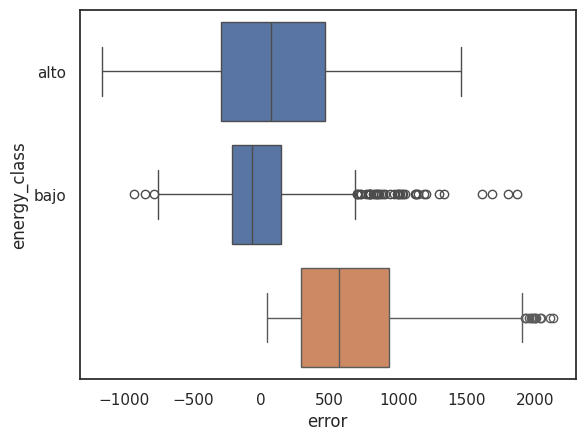

In [ ]:
# Usamos el modelo final para hacer predicciones en el conjunto de datos previo
y_pred = knn_hpo_gscv.predict(X_test_scaled)
tercer_cuartil = df_predict['y_pred'].quantile(0.75)
print("Tercer Cuartil: ", tercer_cuartil)

# Mostramos un boxplot con los errores
df_predict.head(10)
df_predict['energy_class'] = df_predict['y_pred'].apply(energia)
sns.boxplot(data=df_predict, x="error", y="energy_class")
sns.boxplot(data=df_predict, x="y_pred")

# Calculamos el porcentaje de diferencia entre la predicción y el valor real para valores mayores al tercer cuantil
porcentaje_diferencia_grandes = ((y_pred - y_test) / y_test)[y_test > tercer_cuartil]
# Y el porcentaje de diferencia para valores menores al tercer cuantil
porcentaje_diferencia_pequenos = ((y_pred - y_test) / y_test)[y_test <= tercer_cuartil]
print(f"Porcentaje de diferencia para valores MAYORES al tercer cuantil: {abs(porcentaje_diferencia_grandes.mean())*100}%")
print(f"Porcentaje de diferencia para valores MENORES al tercer cuantil: {abs(porcentaje_diferencia_pequenos.mean())*100}%")
print(f"El modelo final es más eficiente para predecir valores {'mayores' if porcentaje_diferencia_grandes.mean() < porcentaje_diferencia_pequenos.mean() else 'menores'} al tercer cuantil.")



Como puede apreciarse en el boxplot, el rango del error cuando la energía se categoriza como "baja" (contando outliers) es similar al rando cuando la energía se categoriza como "alta". Puesto que la frontera entre estas dos categorías es 937.012, esto significa que hay elementos con un valor real muy pequeño con un error parecido al que se encontraría en elementos con un valor real muy grande.

Mirando el porcentaje de error con respecto al valor real, vemos que, en la categoría "alta", este porcentaje es de 67%, mientras que en la categoría "baja" es de 54679%. Esto nos dice que nuestro modelo no ha aprendido a apredecir elementos dentro de la categoría "baja", teniendo un error incompatible con resultados realistas.

# 7) Uso de ChatGPT

En esta práctica, se utilizó ChatGPT principalmente como una herramienta de consulta y soporte para resolver dudas específicas y mejorar la eficiencia del proceso de desarrollo de modelos de aprendizaje automático.

Clarificación de Conceptos: Se consultó a ChatGPT para aclarar conceptos técnicos, como la interpretación de métricas específicas y el ajuste de hiperparámetros. Esto nos ayudo a comprender mejor los modelos.

Soporte en la Codificación: ChatGPT se usó para obtener orientación en la solución de problemas de código y la optimización de implementaciones. Por ejemplo, nos ayudo con la implementación de GridSearchCV y ajustar el cálculo de métricas de evaluación.

Revisión de Errores: Hubo instancias donde la información o el soporte proporcionado por ChatGPT no fue preciso. Por lo tanto tuvimos que consultar documentación oficial, reforzando la importancia de validar la información obtenida de fuentes externas.

A lo largo de la práctica, se hizo uso de ChatGPT para:

- Revisar fragmentos de código para identificar y corregir errores.
- Explicar cómo utilizar correctamente herramientas y funciones de scikit-learn.
Ofrecer ejemplos de cómo interpretar resultados y métricas de los modelos.
- La utilización de ChatGPT contribuyó a agilizar el proceso de desarrollo y análisis de modelos, proporcionando un recurso valioso para la resolución rápida de dudas y la mejora de la calidad del trabajo. LA ayuda de chatgpt no sustituyó la consulta de documentación oficial y recursos especializados para validar la información y las soluciones obtenidas.

**Ejemplos de Prompts que hemos usado:**

**Prompt:** "Explica cómo realizar una validación cruzada con GridSearchCV en scikit-learn"

**Respuesta:** ChatGPT nos dio una serie de pasos para implementar GridSearchCV, incluyendo la definición de parámetros y la interpretación de resultados. Esta guía sirvió como base para la implementación de la optimización de hiperparámetros.

**Prompt:** "¿Cómo interpretar un valor negativo en las puntuaciones de neg_mean_squared_error?".

**Respuesta:** nos aclaró que los valores negativos son utilizados por convención en scikit-learn para las métricas de error, y que deben convertirse tomando el valor absoluto y luego la raíz cuadrada para obtener el RMSE. Esta aclaración fue crucial para la correcta interpretación de los resultados del modelo.
